In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('cirrhosis.csv')
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [31]:
df.drop('ID', inplace=True, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    object 
 2   Drug           312 non-null    object 
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    object 
 5   Ascites        312 non-null    object 
 6   Hepatomegaly   312 non-null    object 
 7   Spiders        312 non-null    object 
 8   Edema          418 non-null    object 
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         310 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      407 non-null    float64
 17  Prothrombin    416 non-null    float64
 18  Stage     

In [32]:
cate_cols = df.select_dtypes(include='object').columns.tolist()
cate_cols.remove('Status')
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [33]:
df[cate_cols].nunique()

Drug            2
Sex             2
Ascites         2
Hepatomegaly    2
Spiders         2
Edema           3
dtype: int64

In [34]:
df[cate_cols].isnull().sum()

Drug            106
Sex               0
Ascites         106
Hepatomegaly    106
Spiders         106
Edema             0
dtype: int64

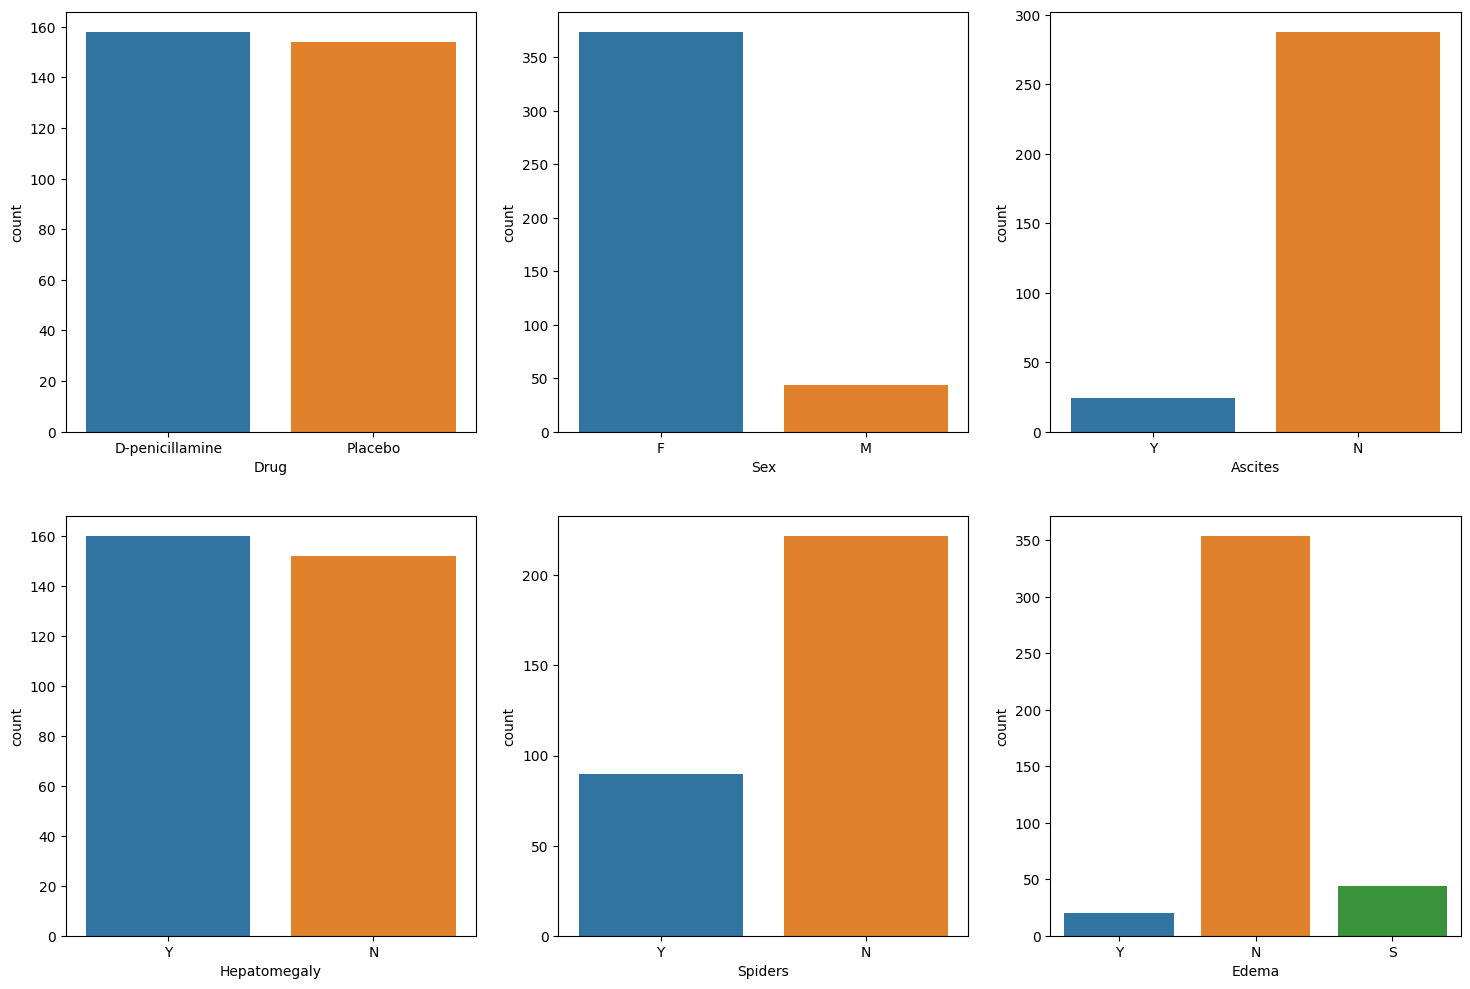

In [35]:
import math
fig, axs = plt.subplots(math.ceil(len(cate_cols) / 3), 3 , figsize=(18,12))
axs = axs.flat
for i, col in enumerate(cate_cols):
    sns.countplot(df, x=col, ax=axs[i])
plt.show()

In [36]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
N_Days,418.0,1917.782297,1104.672992,41.00,1092.7500,1730.00,2613.50,4795.00
Age,418.0,18533.351675,3815.845055,9598.00,15644.5000,18628.00,21272.50,28650.00
Bilirubin,418.0,3.220813,4.407506,0.30,0.8000,1.40,3.40,28.00
Cholesterol,284.0,369.510563,231.944545,120.00,249.5000,309.50,400.00,1775.00
Albumin,418.0,3.497440,0.424972,1.96,3.2425,3.53,3.77,4.64
Copper,310.0,97.648387,85.613920,4.00,41.2500,73.00,123.00,588.00
Alk_Phos,312.0,1982.655769,2140.388824,289.00,871.5000,1259.00,1980.00,13862.40
SGOT,312.0,122.556346,56.699525,26.35,80.6000,114.70,151.90,457.25
Tryglicerides,282.0,124.702128,65.148639,33.00,84.2500,108.00,151.00,598.00
Platelets,407.0,257.024570,98.325585,62.00,188.5000,251.00,318.00,721.00


In [37]:
df[num_cols].isnull().sum()

N_Days             0
Age                0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

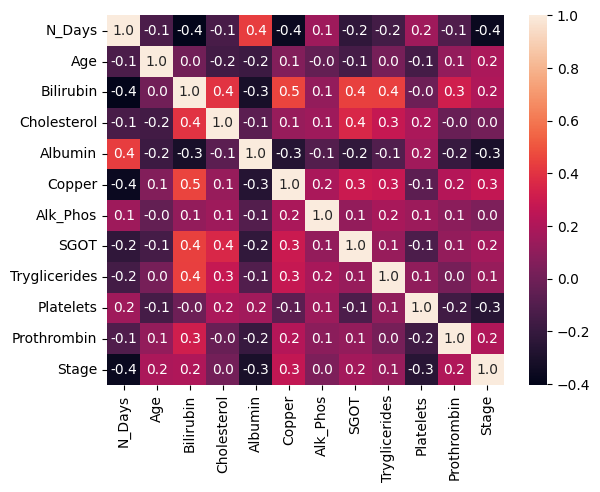

In [38]:
sns.heatmap(df[num_cols].corr() , fmt='.1f', annot=True)
plt.show()

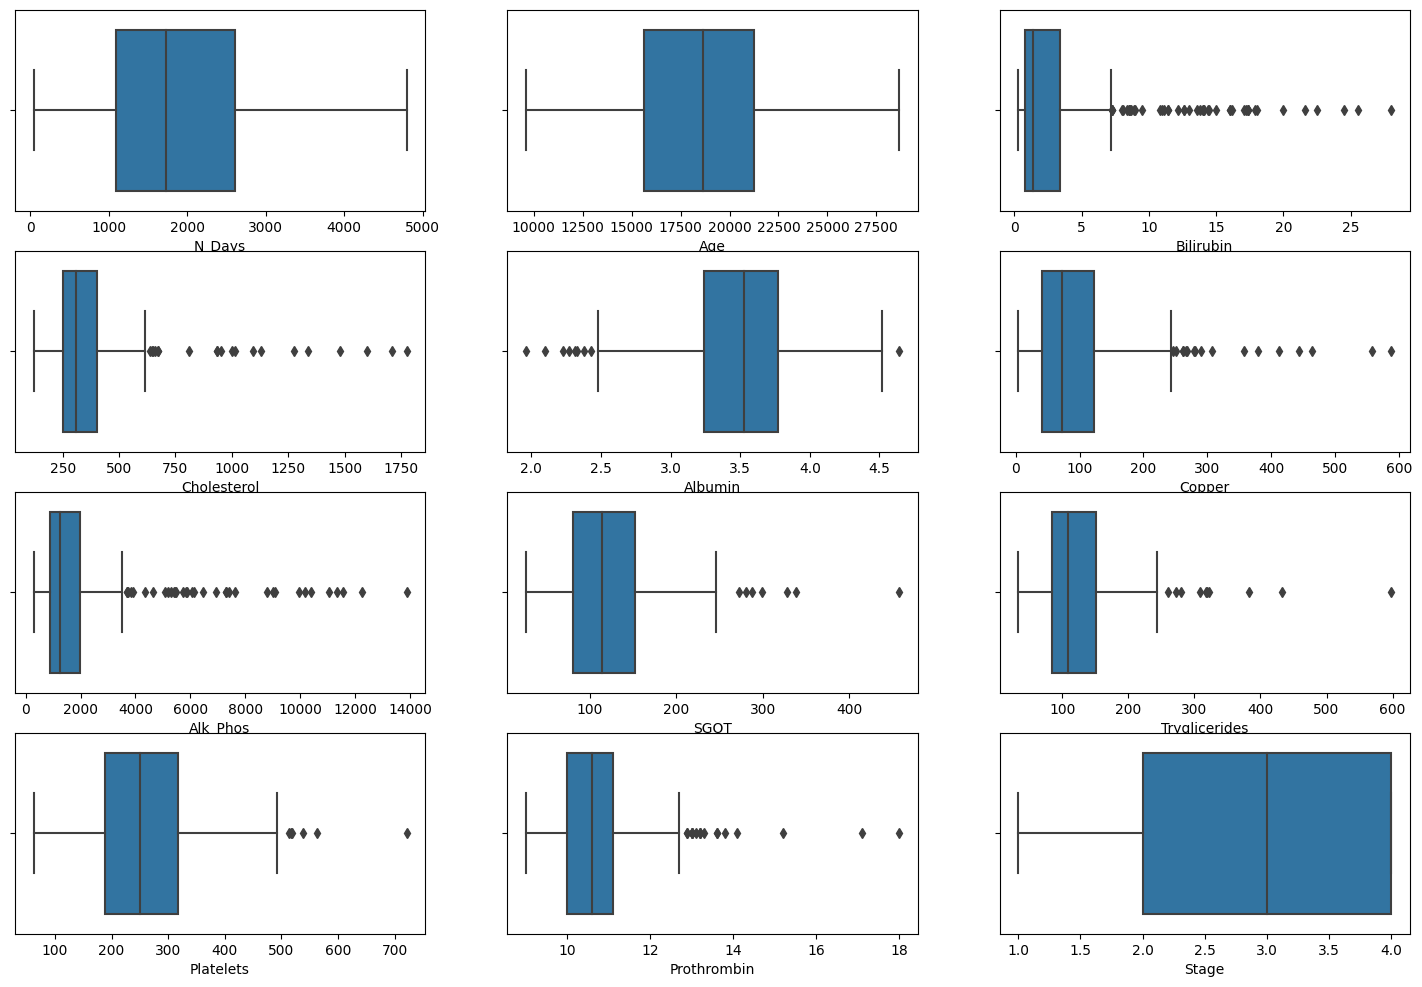

In [39]:
fig, axs = plt.subplots(math.ceil(len(num_cols) / 3), 3, figsize=(18,12))
axs = axs.flat
for i, col in enumerate(num_cols):
    sns.boxplot(df, x=col, ax=axs[i])
plt.show()

In [40]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)

lower_limit = Q1 - 1.5 * (Q3 - Q1)
upper_limit = Q3 + 1.5 * (Q3 - Q1)

df[num_cols] = np.where(df[num_cols] < lower_limit, Q1, df[num_cols])
df[num_cols] = np.where(df[num_cols] > upper_limit, Q3, df[num_cols])

In [49]:
df['Status'].value_counts()

Status
C     232
D     161
CL     25
Name: count, dtype: int64

In [41]:
y = df['Status']
X = df[num_cols + cate_cols].copy()

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [43]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

cate_transformer = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

num_transformer = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('standard', StandardScaler())
])

processor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_cols),
    ('cate', cate_transformer, cate_cols)
])

In [44]:
X_train = processor.fit_transform(X_train)
X_test = processor.transform(X_test)

C:\Users\DELL INSPIRON 5625\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

models = {
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'LogisticRegression': LogisticRegression(),
    'GaussianNB': GaussianNB(),
    'SVC': SVC(),
    'RandomForestClassifier': RandomForestClassifier(),
}

DecisionTreeClassifier 0.6547619047619048


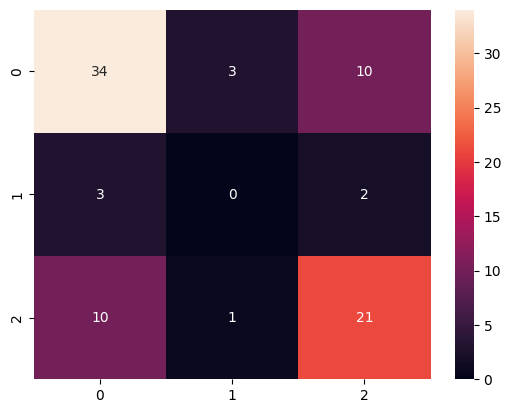

LogisticRegression 0.7261904761904762


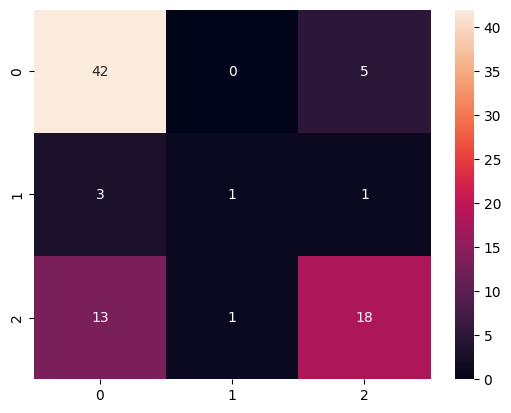

GaussianNB 0.13095238095238096


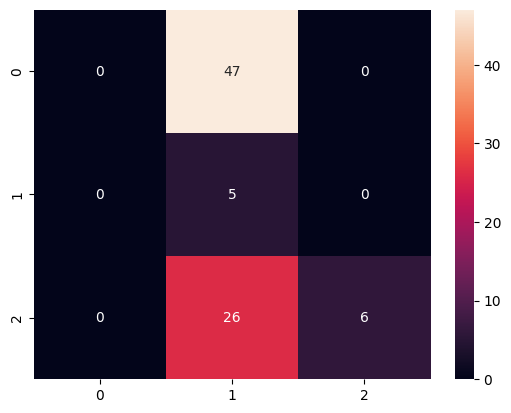

SVC 0.7380952380952381


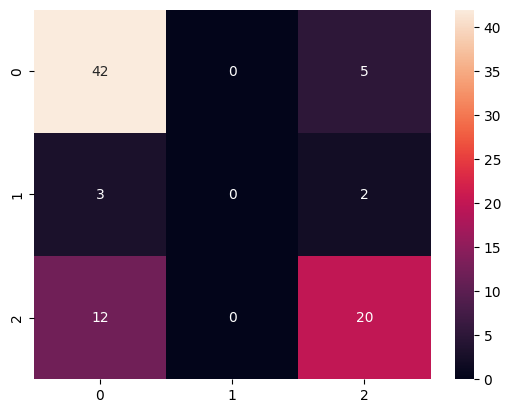

RandomForestClassifier 0.7142857142857143


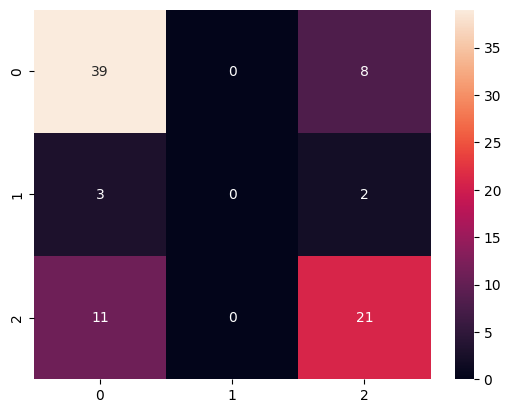

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix

for model_name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    print(model_name, accuracy_score(y_test, pred))
    
    conf_matrix = confusion_matrix(y_test, pred)
    sns.heatmap(conf_matrix, annot=True)
    plt.show()